In [ ]:
from recommender_pipeline import RecommenderTransformer
import pandas as pd
import plotly.express as px
import pickle

In [ ]:
# Load movie data
with open('content_df.pkl', 'rb') as f:
    df = pickle.load(f)

df = df.dropna(subset = ['overview'])
df = df[~df['genres'].apply(lambda x: x == ['no', 'genres', 'listed'])]
df = df[['movieId', 'title', 'overview', 'genres', 'corpus', 'corpus_tokens']].reset_index()

df

,index,movieId,title,overview,genres,corpus,corpus_tokens
0,0,1.0,Toy Story,"Led by Woody, Andy's toys live happily in his ...","[adventure, animation, children, comedy, fantasy]",lead woody andy toy live happily room andy bir...,"[lead, woody, andy, toy, live, happily, room, ..."
1,1,2.0,Jumanji,When siblings Judy and Peter discover an encha...,"[adventure, children, fantasy]",sibling judy peter discover enchant board game...,"[sibling, judy, peter, discover, enchant, boar..."
2,2,3.0,Grumpier Old Men,A family wedding reignites the ancient feud be...,"[comedy, romance]",family wedding reignite ancient feud next door...,"[family, wedding, reignite, ancient, feud, nex..."
3,3,4.0,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...","[comedy, drama, romance]",cheat mistreat step woman hold breath wait elu...,"[cheat, mistreat, step, woman, hold, breath, w..."
4,4,5.0,Father of the Bride Part II,Just when George Banks has recovered from his ...,[comedy],george bank recover daughter wedding receive n...,"[george, bank, recover, daughter, wedding, rec..."
...,...,...,...,...,...,...,...
26545,43843,176193.0,TechnoCalyps,Are we prepared for dealing with the prospect ...,"[documentary, sci, fi]",prepare deal prospect humanity end evolution t...,"[prepare, deal, prospect, humanity, end, evolu..."
26546,43844,176197.0,Rivers of Sand,The people portrayed in this film are called H...,[documentary],people portray film call hamar dwell thorny sc...,"[people, portray, film, call, hamar, dwell, th..."
26547,43845,176199.0,Altar of Fire,This film records a 12 day ritual performed by...,[documentary],film record day ritual perform mambudiri brah...,"[film, record, 12, day, ritual, perform, mambu..."
26548,43847,176217.0,To Be Fat Like Me,"Pretty, popular, and slim high-schooler Aly Sc...","[children, drama]",pretty popular slim high schooler aly schimdt ...,"[pretty, popular, slim, high, schooler, aly, s..."


In [ ]:
# Create a model for LDA, NMF, and Doc2Vec

print('---Building LDA recommender---\n')
lda_recommender = RecommenderTransformer(
    vectorizer = 'tfidf',
    dr_model = 'lda',
    similarity = 'cosine',
    scoring = 'sqrmag',
    n_components = 20
)
lda_recommender.fit_transform(df.copy(deep=True))

print('\n---Building NMF recommender---\n')
nmf_recommender = RecommenderTransformer(
    vectorizer = 'tfidf',
    dr_model = 'nmf',
    similarity = 'cosine',
    scoring = 'sqrmag',
    n_components = 10
)
nmf_recommender.fit_transform(df.copy(deep=True))

print('\n---Building Doc2Vec recommender---\n')
d2v_recommender = RecommenderTransformer(
    vectorizer = 'd2v',
    dr_model = None,
    similarity = 'cosine',
    scoring = 'sqrmag',
    n_components = 10
)
d2v_recommender.fit_transform(df.copy(deep=True))

print('Done!')

---Building LDA recommender---

Fitting TFIDF...
Fitting BOW...
Transforming with BOW...
Transforming with TFIDF...
Fitting LDA...
Transforming with LDA...

---Building NMF recommender---

Fitting TFIDF...
Fitting BOW...
Transforming with BOW...
Transforming with TFIDF...
Fitting NMF...
Transforming with NMF...

---Building Doc2Vec recommender---

Fitting Doc2Vec...
Transforming with Doc2Vec...
Done!


In [ ]:
def print_result(recommendation):
    for movie in recommendation[0]:
        print()
        print(str(movie[0] + 1) + '.', df[df['movieId'] == movie[1]]['title'].iloc[0])
        print('\t', df[df['movieId'] == movie[1]]['overview'].iloc[0])

def print_all_results(lda_recommendation, nmf_recommendation, d2v_recommendation):
    print('-----LDA-----')
    print_results(lda_recommendation)

    print()
    print('-----NMF-----')
    print_results(nmf_recommendation)

    print()
    print('-----Doc2Vec-----')
    print_results(d2v_recommendation)

## Recommendation Test 1: Toy Story

Toy Story's movie id is 1. The audience for Toy Story is fairly broad, but mainly targets younger audiences.

In [ ]:
lda_recommendation = lda_recommender.recommend([1])
nmf_recommendation = nmf_recommender.recommend([1])
d2v_recommendation = d2v_recommender.recommend([1])

In [ ]:
print_all_results(lda_recommendation, nmf_recommendation, d2v_recommendation)

-----LDA-----

0. Winter Light Nattvardsgästerna 
	 Master craftsman Ingmar Bergman explores the search for redemption in a meaningless existence. In this stark depiction of spiritual crisis, small-town pastor Tomas Ericsson performs his duties mechanically before a dwindling congregation. When he is asked to assist with a troubled parishioner’s  debilitating fear of nuclear annihilation, Tomas is terrified to find that he can provide nothing but his own uncertainty.

1. Craft The 
	 A Catholic school newcomer falls in with a clique of teen witches who wield their powers against all who dare to cross them -- be they teachers, rivals or meddlesome parents.

2. Finder s Fee 
	 After finding a wallet in the street tepper calls the owner in order to return it. After making the call he discovers that the lottery ticket inside is a $6 million winner. To add to things his friends are on their way over for their weekly poker night & the groups tradition is to bet their lottery ticket.

3. K PA

NMF and Doc2Vec both perform very well, recommending other animated movies targeted torward the same demographic.
LDA struggle quite a bit, as the first recommendation involves a "meaningless existence" and "nuclear annihilation", a stark contrast to Toy Story.

## Recommendation Test 2: The Matrix

The Matrix's movie id is 2571. The Matrix is a darker movie for older audiences and has a lot of action.

In [ ]:
df[df['title'] == 'Matrix The ']

,index,movieId,title,overview,genres,corpus,corpus_tokens
2181,17919,2571.0,Matrix The,"Set in the 22nd century, The Matrix tells the ...","[action, sci, fi, thriller]",set nd century matrix tell story computer hack...,"[set, 22nd, century, matrix, tell, story, comp..."


In [ ]:
lda_recommendation_2 = lda_recommender.recommend([2571])
nmf_recommendation_2 = nmf_recommender.recommend([2571])
d2v_recommendation_2 = d2v_recommender.recommend([2571])

In [ ]:
print_all_results(lda_recommendation_2, nmf_recommendation_2, d2v_recommendation_2)

-----LDA-----

0. Short Cuts 
	 Multi-storied, fish-eyed look at American culture with some 22 characters intersecting--profoundly or fleetingly--through each other's lives. Running the emotional gamut from disturbing to humorous, Altman's portrait of the contemporary human condition is nevertheless fascinating. Based on nine stories and a prose poem by Raymond Carver.

1. Equilibrium 
	 In a dystopian future, a totalitarian regime maintains peace by subduing the populace with a drug, and displays of emotion are punishable by death. A man in charge of enforcing the law rises to overthrow the system.

2. Johnny Mnemonic 
	 A data courier, literally carrying a data package inside his head, must deliver it before he dies from the burden or is killed by the Yakuza.  In a dystopian 2021, Johnny (Keanu Reeves) is a data trafficker who has an implant that allows him to securely store data too sensitive for regular computer networks. On one delivery run, he accepts a package that not only exce

It's starting to look Doc2Vec and NMF generally work better than LDA, at least for popular movies. I particularly like how Doc2Vec is recommending movies directly based off of the Matrix such as "The Animatrix" and "The Matrix: Revolutions".

## Recommendation Test 3: Toy Story + Jumanji

The movie id's the Toy Story and Jumanji are 1 and 2. Jumanji is not animated and has a little bit more danger involved, but it is still generally for the same audience. Will recommendations feel like a mix of both movies?

In [ ]:
lda_recommendation_3 = lda_recommender.recommend([1, 2])
nmf_recommendation_3 = nmf_recommender.recommend([1, 2])
d2v_recommendation_3 = d2v_recommender.recommend([1, 2])

In [ ]:
print_all_results(lda_recommendation_2, nmf_recommendation_2, d2v_recommendation_2)

-----LDA-----

0. The Decline of Western Civilization Part III 
	 The Decline of Western Civilization III is a 1998 documentary film directed by Penelope Spheeris that chronicles the gutter punk lifestyle of homeless teenagers. It is the third film of a trilogy by Spheeris depicting life in Los Angeles at various points in time. The first film dealt with the punk rock scene during 1980-1981. The second film covers the Los Angeles heavy metal movement of 1986-1988. The film involves hardcore street punks called "gutter punks" who take the anti-establishment message with extreme seriousness, and tune out society completely. Spheeris talks to homeless teenagers living on the street or squatting in abandoned buildings in Los Angeles, as well as an unstable mother, Los Angeles Police Department officer Gary Fredo, and a paralyzed youth living on a disability.

1. Border Radio 
	 Before carving out a niche as one of the most distinct voices in nineties American cinema, Allison Anders made he

LDA continues to struggle to find the right audience, but both NMF and Doc2Vec found Toy Story 3, which is a great recommendation. It's essentially Toy Story but slightly darker and with more danger. I generally like Doc2Vec's recommendations the best out of the three models after this brief testing.

It's also possible to gain some insights about movies by plotting the separate similarity scores. The clear strong correlation between movies suggests that Doc2Vec may find Toy Story and Jumanji to be very similar movies.

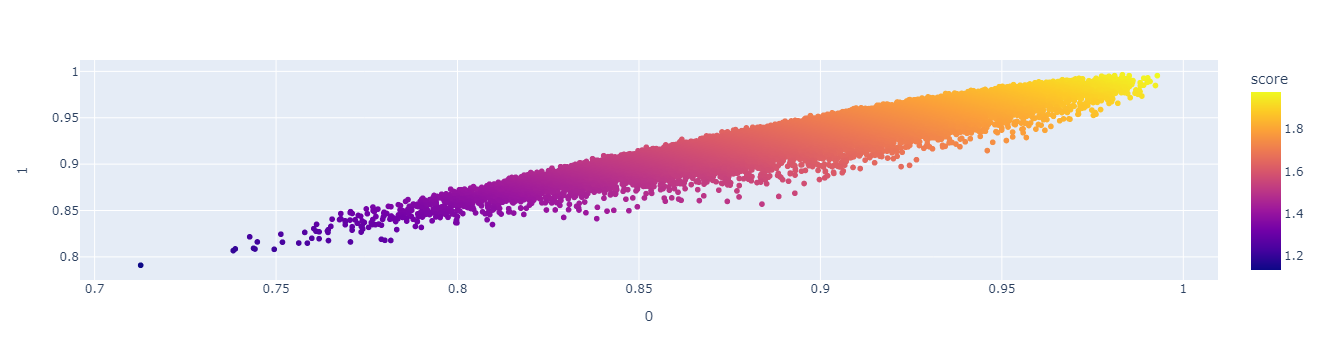

In [ ]:
px.scatter(d2v_recommendation_3[1], x = 0, y = 1, color='score')